## 6주차: 시장의 작동 원리 파헤치기 (수요와 공급 모델링 및 균형 찾기)

**강의 개요:**

지난 5주차에는 코드를 재사용하고 구조화하는 강력한 도구인 **함수(Function)** 에 대해 배웠습니다. 함수를 통해 우리는 수요량 계산, 비용 계산 등 특정 경제 개념이나 계산 로직을 하나의 독립된 단위로 묶을 수 있었습니다. 또한, 딕셔너리를 활용하여 구조화된 데이터를 함수와 함께 사용하는 방법도 익혔습니다.

이번 주에는 우리가 배운 파이썬 지식, 특히 **함수**와 **데이터 구조(리스트)**, 그리고 **시각화(맛보기)** 를 총동원하여 경제학의 가장 핵심적인 모델 중 하나인 **수요와 공급 모형(Supply and Demand Model)** 을 직접 구현하고 분석해 볼 것입니다. 파이썬 함수를 이용해 수요 곡선과 공급 곡선을 표현하고, 두 곡선이 만나는 **시장 균형점(Market Equilibrium)** 을 찾는 방법을 배웁니다. 더 나아가, 수요나 공급에 변화가 생겼을 때(곡선 이동) 시장 균형이 어떻게 변하는지 코드를 통해 시뮬레이션하고 시각적으로 확인해 보겠습니다. 이를 통해 파이썬이 어떻게 경제 모델을 분석하고 시장의 작동 원리를 이해하는 데 강력한 도구가 될 수 있는지 체감하게 될 것입니다.

**이번 시간 학습 목표:**

1.  수요와 공급 모델의 기본 원리(수요/공급의 법칙, 시장 균형)를 복습하고 이해합니다.
2.  파이썬 **함수**를 사용하여 수요 함수($Q_d = f(P)$)와 공급 함수($Q_s = g(P)$)를 정의할 수 있습니다.
3.  간단한 선형 수요/공급 함수가 주어졌을 때, **대수적 방법**으로 시장 균형 가격($P^*$)과 균형 거래량($Q^*$)을 계산하는 로직을 이해하고 파이썬 함수로 구현할 수 있습니다.
4.  `matplotlib` 라이브러리를 사용하여 수요 곡선과 공급 곡선을 **하나의 그래프**에 그리고, 계산된 시장 균형점을 시각적으로 표시할 수 있습니다.
5.  수요 또는 공급 곡선의 **이동(shift)** 이 시장 균형(가격, 거래량)에 미치는 영향을 파이썬 코드 수정 및 시각화를 통해 분석하고 설명할 수 있습니다.

---

## 1. 경제 모델링과 파이썬: 수요와 공급 복습

우리가 파이썬 프로그래밍을 배우는 중요한 이유 중 하나는 바로 **경제 모델(Economic Model)** 을 직접 만들고 분석하기 위해서입니다. 경제 모델은 복잡한 현실 세계를 단순화하여 경제 현상의 작동 원리를 이해하고 예측하는 데 도움을 주는 틀입니다.

그중에서도 **수요와 공급 모델**은 미시경제학의 가장 기본적이면서도 중요한 모델입니다.

* **수요(Demand):** 특정 가격 수준에서 소비자들이 원하는 재화나 서비스의 양입니다. 일반적으로 가격이 오르면 수요량은 감소하고, 가격이 내리면 수요량은 증가합니다 (**수요의 법칙, Law of Demand**). 이는 보통 **우하향하는 수요 곡선**으로 표현됩니다.
* **공급(Supply):** 특정 가격 수준에서 생산자들이 판매하려는 재화나 서비스의 양입니다. 일반적으로 가격이 오르면 공급량은 증가하고, 가격이 내리면 공급량은 감소합니다 (**공급의 법칙, Law of Supply**). 이는 보통 **우상향하는 공급 곡선**으로 표현됩니다.
* **시장 균형(Market Equilibrium):** 수요량과 공급량이 일치하는 지점입니다 ($Q_d = Q_s$). 이 지점에서의 가격을 **균형 가격($P^*$)**, 거래량을 **균형 거래량($Q^*$)** 이라고 합니다. 시장은 보이지 않는 손에 의해 이 균형점을 향해 움직이는 경향이 있습니다.

이제 파이썬을 이용해 이 모델을 어떻게 표현하고 분석할 수 있는지 살펴봅시다.

---

## 2. 수요와 공급 함수 정의하기 (파이썬 함수 활용)

지난주에 함수를 배웠으니, 수요량과 공급량을 계산하는 함수를 만들어 봅시다. 가장 간단한 형태인 선형(Linear) 함수를 사용하겠습니다.

* **선형 수요 함수:** $Q_d = a - bP$
    * $Q_d$: 수요량
    * $P$: 가격
    * $a$: 수요 곡선의 y절편 (가격이 0일 때 수요량, $a > 0$). 소득, 취향 등 가격 외 요인 변화 시 $a$ 값 변동.
    * $b$: 수요 곡선 기울기의 절댓값 ($b > 0$). 가격 변화에 대한 수요량의 민감도.
* **선형 공급 함수:** $Q_s = c + dP$
    * $Q_s$: 공급량
    * $P$: 가격
    * $c$: 공급 곡선의 y절편 (가격이 0일 때 공급량, $c$는 양수, 0, 또는 음수일 수 있음. 생산 기술, 요소 가격 등 가격 외 요인 변화 시 $c$ 값 변동).
    * $d$: 공급 곡선의 기울기 ($d > 0$). 가격 변화에 대한 공급량의 민감도.

이제 이 함수들을 파이썬 코드로 정의해 봅시다.

In [1]:
def quantity_demanded(price, a, b):
  """선형 수요 함수 Q_d = a - bP 를 계산합니다."""
  # 가격이나 파라미터가 음수가 되는 비현실적인 경우를 고려할 수 있으나, 여기서는 단순화
  if b <= 0:
      print("오류: 수요 곡선 기울기(b)는 양수여야 합니다.")
      return None
  q_d = a - b * price
  return max(0, q_d) # 수요량은 0 이상이어야 함

def quantity_supplied(price, c, d):
  """선형 공급 함수 Q_s = c + dP 를 계산합니다."""
  if d <= 0:
      print("오류: 공급 곡선 기울기(d)는 양수여야 합니다.")
      return None
  q_s = c + d * price
  return max(0, q_s) # 공급량은 0 이상이어야 함

# 예시 파라미터 설정 (가상 시장)
# 수요: Qd = 100 - 2P
demand_a = 100
demand_b = 2
# 공급: Qs = 10 + 3P
supply_c = 10
supply_d = 3

# 특정 가격에서 수요량 및 공급량 계산 테스트
test_price = 15
qd_at_15 = quantity_demanded(test_price, demand_a, demand_b)
qs_at_15 = quantity_supplied(test_price, supply_c, supply_d)

print(f"가격이 {test_price}일 때:")
print(f"  수요량(Qd): {qd_at_15}") # 100 - 2*15 = 70
print(f"  공급량(Qs): {qs_at_15}") # 10 + 3*15 = 55

가격이 15일 때:
  수요량(Qd): 70
  공급량(Qs): 55


---

## 3. 시장 균형 찾기 (대수적 방법)

시장 균형은 수요량($Q_d$)과 공급량($Q_s$)이 같아지는 지점입니다. 즉, $Q_d = Q_s$ 를 만족하는 가격($P^*$)과 거래량($Q^*$)을 찾는 것입니다.

선형 함수의 경우, 이 방정식을 $P$에 대해 풀면 균형 가격 $P^*$를 구할 수 있습니다.

$Q_d = a - bP$
$Q_s = c + dP$

균형점에서 $Q_d = Q_s$ 이므로,
$a - bP^* = c + dP^*$
$a - c = bP^* + dP^*$
$a - c = (b + d)P^*$

따라서, 균형 가격 $P^*$는:
$P^* = \frac{a - c}{b + d}$

균형 가격 $P^*$를 구한 뒤, 이를 수요 함수나 공급 함수 중 하나에 대입하면 균형 거래량 $Q^*$를 얻을 수 있습니다.
$Q^* = a - bP^*$ 또는 $Q^* = c + dP^*$

**주의:**
* 분모 $(b + d)$ 가 0이 되면 안 됩니다. (보통 $b>0, d>0$ 이므로 이 경우는 드뭅니다.)
* 계산된 $P^*$ 또는 $Q^*$ 가 음수가 나오면, 해당 시장에서는 (주어진 함수 형태 하에서) 경제적으로 의미 있는 균형이 존재하지 않을 수 있습니다.

이제 이 계산 과정을 파이썬 함수로 만들어 봅시다.

In [2]:
def find_equilibrium(a, b, c, d):
  """선형 수요(Qd=a-bP)와 공급(Qs=c+dP) 함수의 파라미터를 받아
  균형 가격(P*)과 균형 거래량(Q*)을 계산하여 튜플로 반환합니다.
  균형이 없거나 계산할 수 없는 경우 None을 반환합니다.
  """
  # 파라미터 유효성 검사 (기울기는 양수여야 함)
  if b <= 0 or d <= 0:
    print("오류: 수요/공급 곡선 기울기(b, d)는 양수여야 합니다.")
    return None

  # 분모 (b+d)가 0인지 확인 (이론상 발생하기 어려움)
  if (b + d) == 0:
    print("오류: 수요와 공급 곡선 기울기 합이 0입니다. 균형 계산 불가.")
    return None

  # 균형 가격 계산
  p_star = (a - c) / (b + d)

  # 균형 가격이 음수이면 의미 있는 균형 없음
  if p_star < 0:
    print("계산된 균형 가격이 음수입니다. 시장 균형이 존재하지 않을 수 있습니다.")
    return None

  # 균형 거래량 계산 (수요 함수 사용)
  q_star = quantity_demanded(p_star, a, b) # 앞서 정의한 함수 사용
  # 또는 q_star = quantity_supplied(p_star, c, d) 사용해도 결과는 동일 (오차 제외)

  # 균형 거래량이 (계산 오차 감안하여) 0보다 작은 경우도 체크 가능
  # if q_star < -1e-9: # 아주 작은 음수까지는 허용 (부동소수점 오차)
  #     print("계산된 균형 거래량이 음수입니다. 시장 균형이 존재하지 않을 수 있습니다.")
  #     return None

  return p_star, q_star # 균형 가격과 균형 거래량을 튜플로 반환

# 앞서 설정한 파라미터로 균형점 찾기
# Qd = 100 - 2P, Qs = 10 + 3P
equilibrium = find_equilibrium(demand_a, demand_b, supply_c, supply_d)

# 결과 출력
if equilibrium: # 반환값이 None이 아닐 경우 (즉, 균형점을 찾은 경우)
    p_eq, q_eq = equilibrium # 튜플 언패킹 (결과를 각 변수에 할당)
    print(f"\n--- 시장 균형점 ---")
    print(f"균형 가격 (P*): {p_eq:.2f}") # P* = (100-10)/(2+3) = 90/5 = 18
    print(f"균형 거래량 (Q*): {q_eq:.2f}") # Q* = 100 - 2*18 = 64 (또는 10 + 3*18 = 64)
else:
    print("\n시장 균형점을 찾을 수 없습니다.")


--- 시장 균형점 ---
균형 가격 (P*): 18.00
균형 거래량 (Q*): 64.00


---

## 4. 눈으로 보는 시장 균형: 수요와 공급 그래프 그리기

수요/공급 곡선과 균형점을 그래프로 시각화하면 시장의 작동 원리를 훨씬 직관적으로 이해할 수 있습니다. `matplotlib` 라이브러리를 사용하여 그래프를 그려봅시다.

**경제학 그래프 vs 일반 그래프:**
보통 수학이나 프로그래밍에서는 x축을 가로, y축을 세로로 그립니다. 하지만 경제학에서는 관례적으로 **가격을 세로축(y축)**, **수량(거래량)을 가로축(x축)** 에 놓고 그립니다. 이를 반영하여 그래프를 그려보겠습니다. 즉, $P = f(Q)$ 형태의 함수를 그려야 합니다.

우리가 정의한 함수는 $Q = f(P)$ 형태이므로, 그래프를 그리려면:
1.  가격(P) 범위를 정합니다.
2.  각 가격(P)에 대해 수요량($Q_d$)과 공급량($Q_s$)을 계산하여 리스트에 저장합니다.
3.  **가로축에 수량 리스트, 세로축에 가격 리스트**를 넣어 `plt.plot()` 함수를 호출합니다.

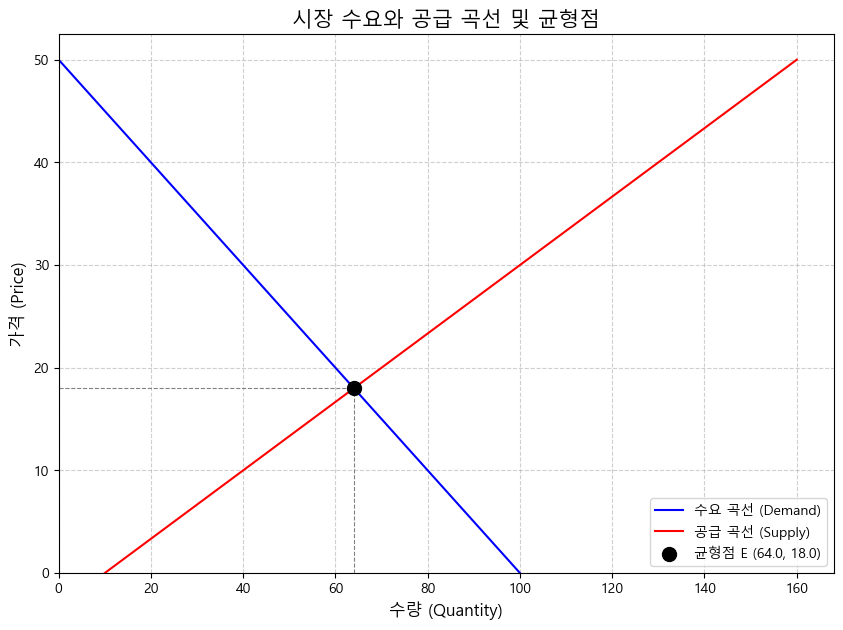

In [3]:
import matplotlib.pyplot as plt
import numpy as np # 수치 계산 및 배열 생성을 위해 NumPy 사용 (없으면 range로 대체 가능)
import platform

# 한글 폰트 설정 (이전 셀에서 실행했다고 가정)
try:
    if platform.system() == 'Linux': plt.rc('font', family='NanumBarunGothic')
    elif platform.system() == 'Windows': plt.rc('font', family='Malgun Gothic')
    elif platform.system() == 'Darwin': plt.rc('font', family='AppleGothic')
except NameError: pass
except FileNotFoundError: print("한글 폰트를 찾을 수 없습니다.")
plt.rcParams['axes.unicode_minus'] = False

# --- 그래프를 위한 데이터 생성 ---
# 파라미터 (이전 예제와 동일)
a, b = 100, 2 # Qd = 100 - 2P
c, d = 10, 3  # Qs = 10 + 3P

# 1. 가격(P) 범위 설정 (균형 가격 근처 포함하도록)
# NumPy의 linspace(시작, 끝, 개수) 사용하면 편리. 또는 list(range(...)) 활용 가능
p_max_demand = a / b # 수요량이 0이 되는 가격 (100/2 = 50)
price_range = np.linspace(0, p_max_demand, 50) # 0부터 50까지 50개 가격 생성
# 만약 NumPy가 없다면: price_range = list(range(0, 51, 1)) # 0부터 50까지 1단위 가격

# 2. 각 가격에 대한 수요량(Qd) 및 공급량(Qs) 계산
qd_values = [quantity_demanded(p, a, b) for p in price_range]
qs_values = [quantity_supplied(p, c, d) for p in price_range]
# 위 코드는 리스트 컴프리헨션(List Comprehension)으로, 아래 for문과 동일
# qd_values = []
# for p in price_range:
#     qd_values.append(quantity_demanded(p, a, b))
# (qs_values도 동일하게 생성 가능)

# 3. 균형점 계산
equilibrium = find_equilibrium(a, b, c, d)
if equilibrium:
    p_eq, q_eq = equilibrium
else: # 균형점 계산 실패 시 그래프에 표시하지 않음
    p_eq, q_eq = None, None

# --- 그래프 그리기 ---
plt.figure(figsize=(10, 7))

# 수요 곡선 플롯 (X축: 수량 Qd, Y축: 가격 P)
plt.plot(qd_values, price_range, label='수요 곡선 (Demand)', color='blue')
# 공급 곡선 플롯 (X축: 수량 Qs, Y축: 가격 P)
plt.plot(qs_values, price_range, label='공급 곡선 (Supply)', color='red')

# 균형점 표시 (균형점이 계산되었을 경우)
if p_eq is not None and q_eq is not None:
    plt.scatter(q_eq, p_eq, color='black', zorder=5, s=100, label=f'균형점 E ({q_eq:.1f}, {p_eq:.1f})')
    # 균형점까지 점선 추가 (선택 사항)
    plt.plot([q_eq, q_eq], [0, p_eq], color='grey', linestyle='--', linewidth=0.8)
    plt.plot([0, q_eq], [p_eq, p_eq], color='grey', linestyle='--', linewidth=0.8)


# 그래프 제목 및 축 레이블 (경제학 관례에 맞게)
plt.title('시장 수요와 공급 곡선 및 균형점', fontsize=15)
plt.xlabel('수량 (Quantity)', fontsize=12)
plt.ylabel('가격 (Price)', fontsize=12)
plt.legend() # 범례 표시
plt.grid(True, linestyle='--', alpha=0.6) # 그리드 표시

# 축 범위 설정 (0 이상으로)
plt.xlim(left=0)
plt.ylim(bottom=0)

plt.show()

그래프를 보면 파란색 수요 곡선과 빨간색 공급 곡선이 만나는 검은색 점이 정확히 우리가 앞에서 계산한 균형점($Q^* \approx 64, P^* = 18$)과 일치하는 것을 확인할 수 있습니다!

---

### [실습 1] 균형점 계산 및 시각화

어떤 가상 상품 시장의 수요와 공급 함수가 다음과 같다고 가정합니다.
* 수요 함수: $Q_d = 150 - 3P$
* 공급 함수: $Q_s = 30 + 2P$

1.  위 수요/공급 함수를 나타내는 파이썬 함수 `quantity_demanded_ex1` 와 `quantity_supplied_ex1` 을 정의하세요. (파라미터 a, b, c, d 값 확인!)
2.  앞서 정의한 `find_equilibrium` 함수를 사용하여 이 시장의 균형 가격($P^*$)과 균형 거래량($Q^*$)을 계산하고 출력하세요.
3.  NumPy 또는 `range`를 이용하여 적절한 가격 범위를 설정하고, 각 가격에 대한 수요량과 공급량 리스트를 만드세요.
4.  `matplotlib`을 이용하여 수요 곡선과 공급 곡선을 그리고, 계산된 균형점을 그래프에 표시하세요. (X축: 수량, Y축: 가격)

---

In [4]:
# 실습 1-1: 함수 정의 (기존 함수 재사용)
# quantity_demanded 함수와 quantity_supplied 함수는 이미 위에서 정의됨

# 파라미터 설정
a_ex1, b_ex1 = 150, 3
c_ex1, d_ex1 = 30, 2

In [5]:
# 실습 1-2: 균형점 계산
equilibrium_ex1 = find_equilibrium(a_ex1, b_ex1, c_ex1, d_ex1)

if equilibrium_ex1:
    p_eq_ex1, q_eq_ex1 = equilibrium_ex1
    print(f"--- 실습 1 시장 균형점 ---")
    print(f"균형 가격 (P*): {p_eq_ex1:.2f}") # (150-30)/(3+2) = 120/5 = 24
    print(f"균형 거래량 (Q*): {q_eq_ex1:.2f}") # 150 - 3*24 = 78 (또는 30 + 2*24 = 78)
else:
    print("시장 균형점을 찾을 수 없습니다.")

--- 실습 1 시장 균형점 ---
균형 가격 (P*): 24.00
균형 거래량 (Q*): 78.00


In [6]:
# 실습 1-3: 시각화를 위한 데이터 생성
import numpy as np
import matplotlib.pyplot as plt

# a, b, c, d 값 설정 (이미 위에서 함)
# a_ex1, b_ex1 = 150, 3
# c_ex1, d_ex1 = 30, 2

# 적절한 가격 범위 설정
p_max_demand_ex1 = a_ex1 / b_ex1
price_range_ex1 = np.linspace(0, p_max_demand_ex1, 50)

# 수요량 및 공급량 리스트 계산
qd_values_ex1 = [quantity_demanded(p, a_ex1, b_ex1) for p in price_range_ex1]
qs_values_ex1 = [quantity_supplied(p, c_ex1, d_ex1) for p in price_range_ex1]

# 균형점 다시 계산 (그래프 표시용)
# equilibrium_ex1 = find_equilibrium(a_ex1, b_ex1, c_ex1, d_ex1) # 이미 위에서 함
# p_eq_ex1, q_eq_ex1 = (None, None) # 초기화
# if equilibrium_ex1:
#     p_eq_ex1, q_eq_ex1 = equilibrium_ex1 # 이미 위에서 함

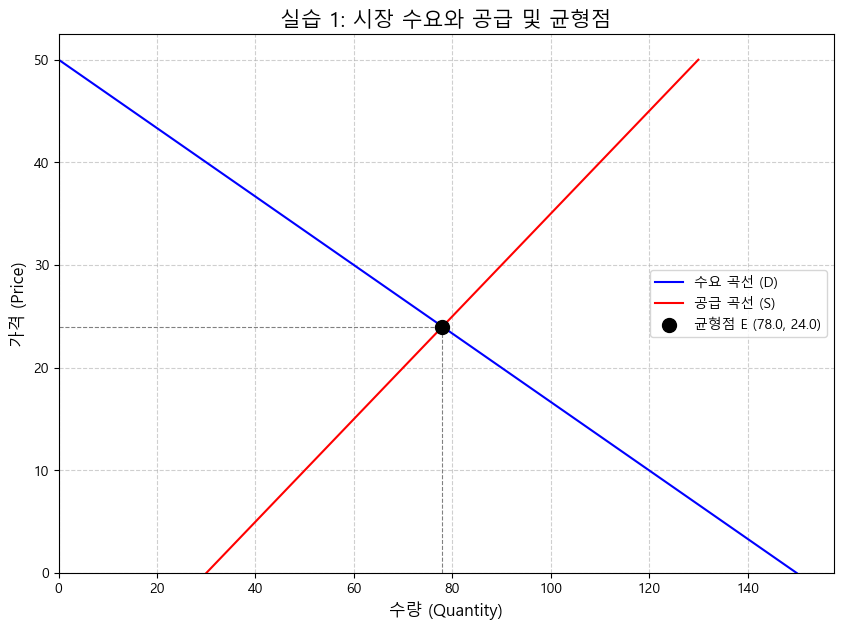

In [7]:
# 실습 1-4: 그래프 그리기
# 한글 폰트 설정 등은 이전 셀에서 적용되었다고 가정

plt.figure(figsize=(10, 7))
plt.plot(qd_values_ex1, price_range_ex1, label='수요 곡선 (D)', color='blue')
plt.plot(qs_values_ex1, price_range_ex1, label='공급 곡선 (S)', color='red')

if p_eq_ex1 is not None and q_eq_ex1 is not None:
    plt.scatter(q_eq_ex1, p_eq_ex1, color='black', zorder=5, s=100, label=f'균형점 E ({q_eq_ex1:.1f}, {p_eq_ex1:.1f})')
    plt.plot([q_eq_ex1, q_eq_ex1], [0, p_eq_ex1], color='grey', linestyle='--', linewidth=0.8)
    plt.plot([0, q_eq_ex1], [p_eq_ex1, p_eq_ex1], color='grey', linestyle='--', linewidth=0.8)

plt.title('실습 1: 시장 수요와 공급 및 균형점', fontsize=15)
plt.xlabel('수량 (Quantity)', fontsize=12)
plt.ylabel('가격 (Price)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

---

## 5. 수요와 공급의 변화 분석하기 (곡선 이동)

수요와 공급 곡선은 고정된 것이 아니라, 가격 외 다른 요인들에 의해 **이동(shift)** 할 수 있습니다.

* **수요 곡선 이동 요인:** 소득 변화, 연관재 가격 변화, 소비자의 취향 변화, 미래 가격 예상 변화, 인구 변화 등
* **공급 곡선 이동 요인:** 기술 발전, 생산 요소 가격 변화, 정부 정책(세금, 보조금), 미래 가격 예상 변화, 공급자 수 변화 등

파이썬 함수를 이용하면 이러한 변화를 **파라미터 수정**으로 쉽게 반영하고, 새로운 균형점을 계산하며 시각화를 통해 그 효과를 직관적으로 확인할 수 있습니다.

**예제 1: 수요 증가 시뮬레이션**

소득 증가로 인해 수요 함수의 $a$ 값이 100에서 120으로 증가했다고 가정해 봅시다. ($Q_d = 120 - 2P$, 공급은 $Q_s = 10 + 3P$ 로 동일)

--- 수요 증가 후 새로운 균형점 ---
새 균형 가격 (P*'): 22.00
새 균형 거래량 (Q*'): 76.00


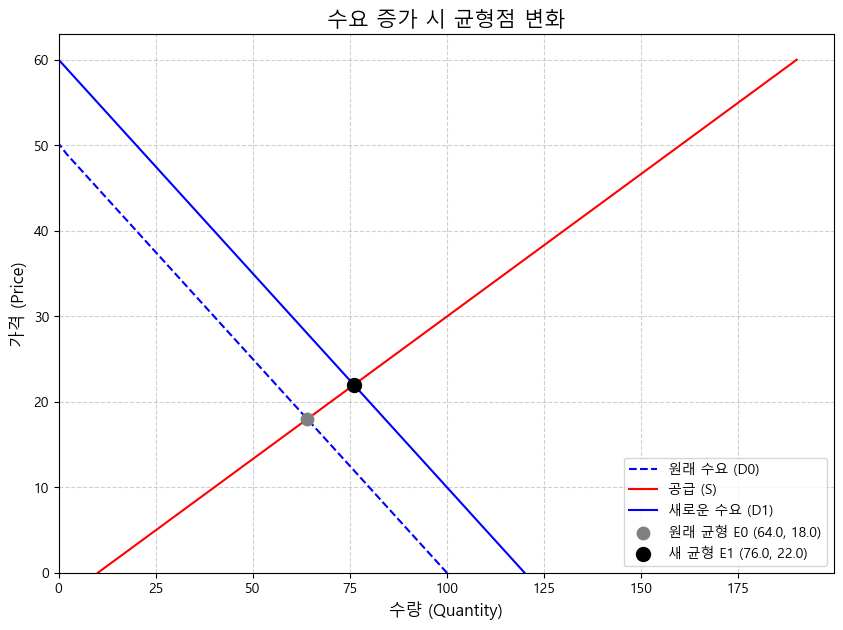


결과 해석: 수요 증가는 균형 가격과 균형 거래량을 모두 상승시킵니다.
(P: 18.0 -> 22.0), (Q: 64.0 -> 76.0)


In [8]:
# --- 수요 증가 시뮬레이션 ---
# 원래 파라미터
a_old, b_old = 100, 2
c_old, d_old = 10, 3

# 수요 증가 후 새 파라미터 (a만 변경)
a_new = 120
b_new = b_old # b는 그대로
c_new, d_new = c_old, d_old # 공급은 그대로

# 1. 새로운 균형점 계산
equilibrium_new_demand = find_equilibrium(a_new, b_new, c_new, d_new)
if equilibrium_new_demand:
    p_eq_new_d, q_eq_new_d = equilibrium_new_demand
    print("--- 수요 증가 후 새로운 균형점 ---")
    print(f"새 균형 가격 (P*'): {p_eq_new_d:.2f}") # (120-10)/(2+3) = 110/5 = 22
    print(f"새 균형 거래량 (Q*'): {q_eq_new_d:.2f}") # 120 - 2*22 = 76
else:
    print("새로운 균형점을 찾을 수 없습니다.")
    p_eq_new_d, q_eq_new_d = None, None # 시각화를 위해 초기화

# 2. 시각화: 이전 곡선과 새 수요 곡선, 새 균형점 표시
price_range_shift = np.linspace(0, a_new / b_new, 50) # 새 수요에 맞춰 가격 범위 조정
qd_values_old = [quantity_demanded(p, a_old, b_old) for p in price_range_shift]
qs_values_shift = [quantity_supplied(p, c_new, d_new) for p in price_range_shift]
qd_values_new = [quantity_demanded(p, a_new, b_new) for p in price_range_shift]

# 원래 균형점 (위에서 계산된 값 사용)
# p_eq, q_eq

plt.figure(figsize=(10, 7))
# 원래 수요(파선), 공급 곡선
plt.plot(qd_values_old, price_range_shift, label='원래 수요 (D0)', color='blue', linestyle='--')
plt.plot(qs_values_shift, price_range_shift, label='공급 (S)', color='red')
# 새로운 수요 곡선 (실선)
plt.plot(qd_values_new, price_range_shift, label='새로운 수요 (D1)', color='blue', linestyle='-')

# 원래 균형점 표시
if p_eq is not None and q_eq is not None:
    plt.scatter(q_eq, p_eq, color='grey', zorder=5, s=80, label=f'원래 균형 E0 ({q_eq:.1f}, {p_eq:.1f})')
# 새로운 균형점 표시
if p_eq_new_d is not None and q_eq_new_d is not None:
    plt.scatter(q_eq_new_d, p_eq_new_d, color='black', zorder=5, s=100, label=f'새 균형 E1 ({q_eq_new_d:.1f}, {p_eq_new_d:.1f})')

plt.title('수요 증가 시 균형점 변화', fontsize=15)
plt.xlabel('수량 (Quantity)', fontsize=12)
plt.ylabel('가격 (Price)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

# 결과 해석
print("\n결과 해석: 수요 증가는 균형 가격과 균형 거래량을 모두 상승시킵니다.")
print(f"(P: {p_eq:.1f} -> {p_eq_new_d:.1f}), (Q: {q_eq:.1f} -> {q_eq_new_d:.1f})")

그래프에서 수요 곡선이 오른쪽으로 이동(D0 -> D1)하면서 균형점(E0 -> E1)이 오른쪽 위로 이동하여 가격과 거래량 모두 증가하는 것을 명확히 볼 수 있습니다.

**예제 2: 공급 증가 시뮬레이션 (기술 발전)**

기술 발전으로 공급 곡선의 $c$ 값이 10에서 30으로 증가했다고 가정해 봅시다. ($Q_s = 30 + 3P$, 수요는 $Q_d = 100 - 2P$ 로 동일)

--- 공급 증가 후 새로운 균형점 ---
새 균형 가격 (P*''): 14.00
새 균형 거래량 (Q*''): 72.00


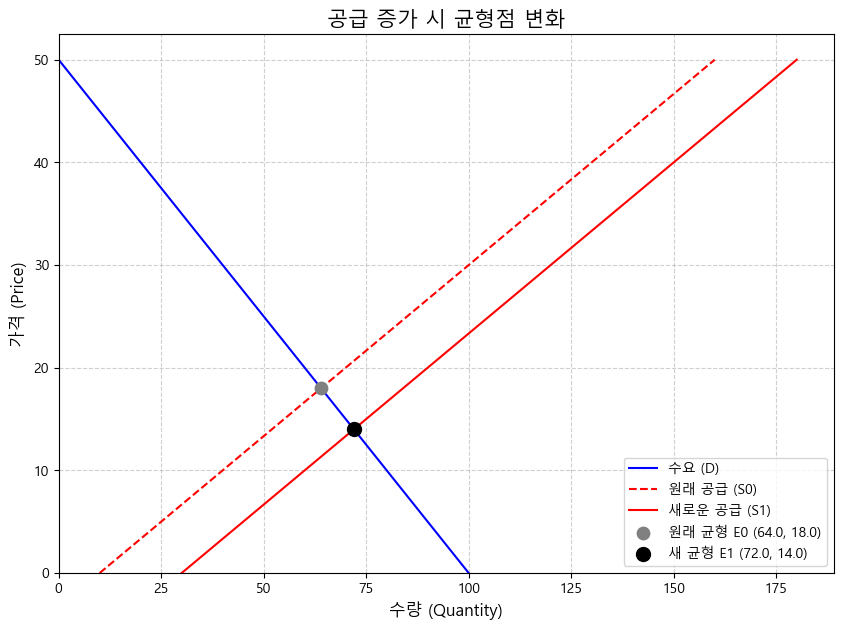


결과 해석: 공급 증가는 균형 가격을 하락시키고 균형 거래량을 상승시킵니다.
(P: 18.0 -> 14.0), (Q: 64.0 -> 72.0)


In [10]:
# --- 공급 증가 시뮬레이션 ---
# 원래 파라미터
a_old, b_old = 100, 2
c_old, d_old = 10, 3

# 공급 증가 후 새 파라미터 (c만 변경)
a_new_s = a_old
b_new_s = b_old # 수요는 그대로
c_new_s = 30 # c 값 증가
d_new_s = d_old # d는 그대로

# 1. 새로운 균형점 계산
equilibrium_new_supply = find_equilibrium(a_new_s, b_new_s, c_new_s, d_new_s)
if equilibrium_new_supply:
    p_eq_new_s, q_eq_new_s = equilibrium_new_supply
    print("--- 공급 증가 후 새로운 균형점 ---")
    print(f"새 균형 가격 (P*''): {p_eq_new_s:.2f}") # (100-30)/(2+3) = 70/5 = 14
    print(f"새 균형 거래량 (Q*''): {q_eq_new_s:.2f}") # 100 - 2*14 = 72
else:
    print("새로운 균형점을 찾을 수 없습니다.")
    p_eq_new_s, q_eq_new_s = None, None

# 2. 시각화: 이전 곡선과 새 공급 곡선, 새 균형점 표시
price_range_shift_s = np.linspace(0, a_new_s / b_new_s, 50)
qd_values_shift_s = [quantity_demanded(p, a_new_s, b_new_s) for p in price_range_shift_s]
qs_values_old = [quantity_supplied(p, c_old, d_old) for p in price_range_shift_s]
qs_values_new = [quantity_supplied(p, c_new_s, d_new_s) for p in price_range_shift_s]

# 원래 균형점 (이전 계산 값 사용)
# p_eq, q_eq

plt.figure(figsize=(10, 7))
# 수요 곡선, 원래 공급 곡선(파선)
plt.plot(qd_values_shift_s, price_range_shift_s, label='수요 (D)', color='blue')
plt.plot(qs_values_old, price_range_shift_s, label='원래 공급 (S0)', color='red', linestyle='--')
# 새로운 공급 곡선 (실선)
plt.plot(qs_values_new, price_range_shift_s, label='새로운 공급 (S1)', color='red', linestyle='-')

# 원래 균형점 표시
if p_eq is not None and q_eq is not None:
    plt.scatter(q_eq, p_eq, color='grey', zorder=5, s=80, label=f'원래 균형 E0 ({q_eq:.1f}, {p_eq:.1f})')
# 새로운 균형점 표시
if p_eq_new_s is not None and q_eq_new_s is not None:
    plt.scatter(q_eq_new_s, p_eq_new_s, color='black', zorder=5, s=100, label=f'새 균형 E1 ({q_eq_new_s:.1f}, {p_eq_new_s:.1f})')

plt.title('공급 증가 시 균형점 변화', fontsize=15)
plt.xlabel('수량 (Quantity)', fontsize=12)
plt.ylabel('가격 (Price)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

# 결과 해석
print("\n결과 해석: 공급 증가는 균형 가격을 하락시키고 균형 거래량을 상승시킵니다.")
print(f"(P: {p_eq:.1f} -> {p_eq_new_s:.1f}), (Q: {q_eq:.1f} -> {q_eq_new_s:.1f})")

그래프에서 공급 곡선이 오른쪽으로 이동(S0 -> S1)하면서 균형점(E0 -> E1)이 오른쪽 아래로 이동하여 가격은 하락하고 거래량은 증가하는 것을 명확히 볼 수 있습니다.

---

### [실습 2] 수요/공급 변화 분석

실습 1의 시장($Q_d = 150 - 3P$, $Q_s = 30 + 2P$)을 기준으로 다음 변화의 효과를 분석하세요.

1.  **수요 감소:** 소비자들의 선호도 감소로 수요 함수의 $a$ 값이 150에서 120으로 감소했습니다 ($Q_d = 120 - 3P$). 공급 함수는 그대로입니다. 새로운 균형 가격과 거래량을 계산하고, 원래 균형과 비교하여 가격과 거래량이 어떻게 변했는지 설명하세요.
2.  **(선택) 시각화:** 위 수요 감소 상황을 시각화하세요. 원래 수요/공급 곡선과 **변경된 수요 곡선**, 그리고 원래 균형점과 **새로운 균형점**을 하나의 그래프에 표시하세요.

---

1. 힌트 템플릿

```{python3}
# 실습 2-1: 수요 감소 후 새 균형점 계산 및 변화 설명
# 원래 파라미터 (실습 1 기준)
a_ex1_old, b_ex1_old = 150, 3
c_ex1_old, d_ex1_old = 30, 2

# 수요 감소 후 새 파라미터
a_ex1_new = 120
b_ex1_new = b_ex1_old
c_ex1_new, d_ex1_new = c_ex1_old, d_ex1_old

# 새로운 균형점 계산
equilibrium_new_demand_ex1 = # find_equilibrium 호출
p_eq_new_d_ex1, q_eq_new_d_ex1 = None, None
if equilibrium_new_demand_ex1:
    p_eq_new_d_ex1, q_eq_new_d_ex1 = equilibrium_new_demand_ex1
    print("--- 수요 감소 후 새로운 균형점 ---")
    # 새 균형 가격과 거래량 출력

# 원래 균형점 (실습 1 정답 값 활용)
# p_eq_ex1, q_eq_ex1 = 24, 78

# 변화 설명 출력
# 여기에 가격과 거래량이 어떻게 변했는지 설명하는 print 문 작성
```

2. 힌트 템플릿
```{python3}
# 실습 2-2 (선택): 수요 감소 시각화
# import numpy as np # 필요시
# import matplotlib.pyplot as plt # 필요시

# 파라미터 설정 (old, new)
# ...

# 가격 범위 설정
# price_range_ex1_shift = ...

# 수요/공급량 리스트 계산 (원래 S, 원래 D, 새로운 D)
# qd_values_ex1_old = ...
# qs_values_ex1_shift = ...
# qd_values_ex1_new = ...

# 균형점 정보 (원래, 새로운)
# p_eq_ex1, q_eq_ex1 = ...
# p_eq_new_d_ex1, q_eq_new_d_ex1 = ...

# 그래프 그리기
# plt.figure(...)
# plt.plot(..., label='원래 수요 (D0)', linestyle='--')
# plt.plot(..., label='공급 (S)', ...)
# plt.plot(..., label='새로운 수요 (D1)', linestyle='-')
# plt.scatter(원래 균형점)
# plt.scatter(새로운 균형점)
# ... (제목, 레이블, 범례, 그리드, 축 범위, show)
```

In [14]:
# 실습 2-1: 수요 감소 후 새 균형점 계산 및 변화 설명
# 원래 파라미터 (실습 1 기준)
a_ex1_old, b_ex1_old = 150, 3
c_ex1_old, d_ex1_old = 30, 2

# 수요 감소 후 새 파라미터
a_ex1_new = 120
b_ex1_new = b_ex1_old
c_ex1_new, d_ex1_new = c_ex1_old, d_ex1_old

# 새로운 균형점 계산
equilibrium_new_demand_ex1 = find_equilibrium(a_ex1_new, b_ex1_new, c_ex1_new, d_ex1_new)
p_eq_new_d_ex1, q_eq_new_d_ex1 = None, None
if equilibrium_new_demand_ex1:
    p_eq_new_d_ex1, q_eq_new_d_ex1 = equilibrium_new_demand_ex1
    print("--- 수요 감소 후 새로운 균형점 ---")
    print(f"새 균형 가격 (P*'): {p_eq_new_d_ex1:.2f}") # (120-30)/(3+2) = 90/5 = 18
    print(f"새 균형 거래량 (Q*'): {q_eq_new_d_ex1:.2f}") # 120 - 3*18 = 66
else:
    print("새로운 균형점을 찾을 수 없습니다.")

# 원래 균형점 (실습 1 정답 값)
p_eq_ex1, q_eq_ex1 = 24, 78

# 변화 설명 출력
print("\n--- 균형점 변화 분석 ---")
if p_eq_new_d_ex1 is not None and q_eq_new_d_ex1 is not None:
    print("수요 감소는 원래 균형점(P=24, Q=78)과 비교하여")
    print(f"균형 가격을 {p_eq_ex1:.1f}에서 {p_eq_new_d_ex1:.1f}로 하락시키고,")
    print(f"균형 거래량을 {q_eq_ex1:.1f}에서 {q_eq_new_d_ex1:.1f}로 감소시킵니다.")
else:
    print("원래 또는 새로운 균형점을 계산할 수 없어 변화를 분석할 수 없습니다.")

--- 수요 감소 후 새로운 균형점 ---
새 균형 가격 (P*'): 18.00
새 균형 거래량 (Q*'): 66.00

--- 균형점 변화 분석 ---
수요 감소는 원래 균형점(P=24, Q=78)과 비교하여
균형 가격을 24.0에서 18.0로 하락시키고,
균형 거래량을 78.0에서 66.0로 감소시킵니다.


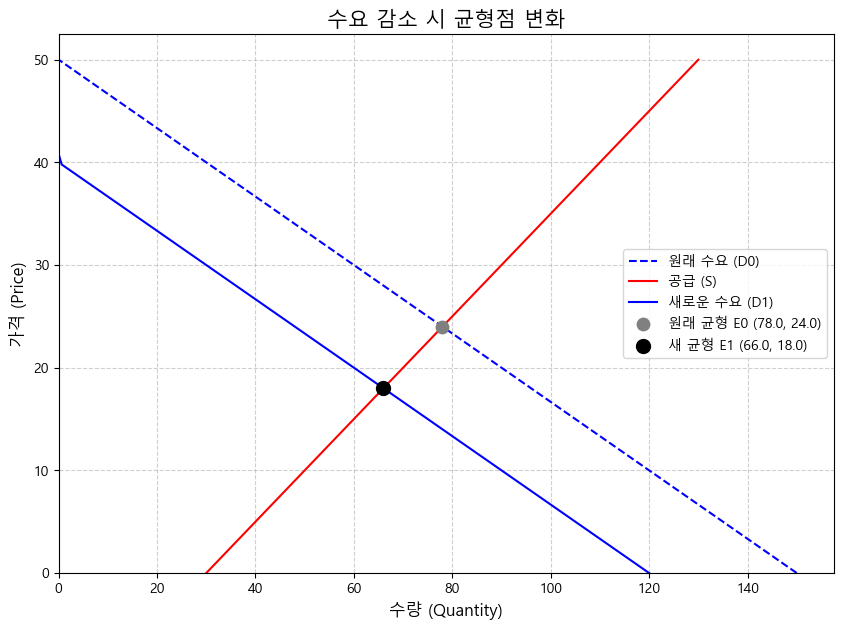

In [15]:
# 실습 2-2 (선택): 수요 감소 시각화
import numpy as np
import matplotlib.pyplot as plt

# 파라미터 설정 (old, new)
a_ex1_old, b_ex1_old = 150, 3
c_ex1_old, d_ex1_old = 30, 2
a_ex1_new = 120
b_ex1_new = b_ex1_old
c_ex1_new, d_ex1_new = c_ex1_old, d_ex1_old

# 가격 범위 설정
p_max_demand_ex1_old = a_ex1_old / b_ex1_old
p_max_demand_ex1_new = a_ex1_new / b_ex1_new
price_range_ex1_shift = np.linspace(0, p_max_demand_ex1_old, 50) # 더 넓은 범위 사용

# 수요/공급량 리스트 계산
qd_values_ex1_old = [quantity_demanded(p, a_ex1_old, b_ex1_old) for p in price_range_ex1_shift]
qs_values_ex1_shift = [quantity_supplied(p, c_ex1_new, d_ex1_new) for p in price_range_ex1_shift]
qd_values_ex1_new = [quantity_demanded(p, a_ex1_new, b_ex1_new) for p in price_range_ex1_shift]

# 균형점 정보 (원래, 새로운 - 위 셀에서 계산됨)
# p_eq_ex1, q_eq_ex1 = 24, 78
# p_eq_new_d_ex1, q_eq_new_d_ex1 = 18, 66

# 그래프 그리기
# 한글 폰트 설정 등은 이전에 적용되었다고 가정
plt.figure(figsize=(10, 7))
plt.plot(qd_values_ex1_old, price_range_ex1_shift, label='원래 수요 (D0)', color='blue', linestyle='--')
plt.plot(qs_values_ex1_shift, price_range_ex1_shift, label='공급 (S)', color='red')
plt.plot(qd_values_ex1_new, price_range_ex1_shift, label='새로운 수요 (D1)', color='blue', linestyle='-')

if p_eq_ex1 is not None and q_eq_ex1 is not None:
    plt.scatter(q_eq_ex1, p_eq_ex1, color='grey', zorder=5, s=80, label=f'원래 균형 E0 ({q_eq_ex1:.1f}, {p_eq_ex1:.1f})')
if p_eq_new_d_ex1 is not None and q_eq_new_d_ex1 is not None:
    plt.scatter(q_eq_new_d_ex1, p_eq_new_d_ex1, color='black', zorder=5, s=100, label=f'새 균형 E1 ({q_eq_new_d_ex1:.1f}, {p_eq_new_d_ex1:.1f})')

plt.title('수요 감소 시 균형점 변화', fontsize=15)
plt.xlabel('수량 (Quantity)', fontsize=12)
plt.ylabel('가격 (Price)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

---

## 6. 마무리 및 다음 시간 예고

오늘은 파이썬 함수와 기본 로직을 활용하여 경제학의 핵심 모델인 **수요와 공급 모형**을 구현하고 분석하는 방법을 배웠습니다. 함수로 수요와 공급 관계를 표현하고, 대수적으로 **시장 균형점**을 계산했으며, `matplotlib`을 이용해 이를 **시각화**하여 눈으로 확인했습니다. 또한, 수요나 공급 곡선이 **이동**했을 때 새로운 균형점이 어떻게 변하는지 시뮬레이션하고 그 결과를 그래프로 분석하는 과정까지 경험했습니다. 이를 통해 파이썬이 단순한 코딩 도구를 넘어, **경제 이론을 검증하고 시장 현상을 분석하는 강력한 도구**가 될 수 있음을 확인하셨기를 바랍니다.

**다음 시간에는:**

이번 주까지 파이썬의 기본적인 문법과 자료 구조, 제어 흐름, 함수, 그리고 간단한 모델링 및 시각화까지 경험했습니다. 다음 주에는 본격적으로 **데이터 시각화(Data Visualization)** 에 초점을 맞추어 `matplotlib` 라이브러리의 다양한 기능을 좀 더 체계적으로 배우는 시간을 갖겠습니다. 여러 종류의 그래프(선, 막대, 산점도 등)를 그리는 방법, 그래프의 축, 제목, 범례 등을 꾸미는 방법 등을 익혀서 데이터를 더욱 효과적으로 표현하고 전달하는 능력을 키울 것입니다.

---

## 여섯 번째 주차 과제

오늘 배운 수요/공급 모델링 및 분석을 연습하기 위해 다음 과제를 Colab에서 새 노트(`Week6_Assignment.ipynb` 등)에 풀어보세요.

1.  **새로운 시장 분석:** 어떤 시장의 수요 함수가 $Q_d = 200 - 4P$ 이고, 공급 함수가 $Q_s = 50 + P$ 라고 합니다.
    * 이 시장의 균형 가격($P^*$)과 균형 거래량($Q^*$)을 계산하세요. (함수 정의 및 `find_equilibrium` 활용)
    * (선택) 계산된 균형점을 포함하여 수요/공급 곡선을 시각화하세요.
2.  **공급 감소 분석:** 위 1번 시장에서, 생산 비용 증가로 공급 함수가 $Q_s = 20 + P$ 로 변했다고 가정합니다 ($c$ 값이 50에서 20으로 감소). 수요 함수는 그대로입니다.
    * 새로운 균형 가격과 거래량을 계산하세요.
    * 공급 감소가 균형 가격과 거래량에 어떤 영향을 미쳤는지 원래 균형과 비교하여 설명하세요.
    * (선택) 원래 수요/공급 곡선과 **변경된 공급 곡선**, 그리고 원래 균형점과 **새로운 균형점**을 하나의 그래프에 시각화하세요.
3.  **수요/공급 동시 변화 (생각해보기):** 만약 위 1번 시장에서 소득 증가로 수요가 $Q_d = 220 - 4P$ 로 증가하는 **동시에**, 기술 발전으로 공급이 $Q_s = 60 + P$ 로 증가했다면, 새로운 균형 가격과 거래량은 어떻게 변할지 계산해보고, 원래 균형과 비교하여 설명해보세요. (시각화는 선택)

---